In [ ]:
from torchvision import transforms
from torchvision.datasets import MNIST

train_data = MNIST('mnist_train', train=True, transform=transforms.ToTensor(), download=True)
test_data = MNIST('mnist_test', train=False, transform=transforms.ToTensor(), download=True)
print("Train data shape: {0}".format(train_data.data.shape))

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm

input_dim = (1, 28, 28)
hidden_layers = [50, 100, 500]
output_dim = 10

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

model = CharacterClassifier(input_dim, hidden_layers, output_dim)
model.train()

epochs = 5
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 300 == 0:
                print('Loss: {}'.format(loss))
            torch.save(model.state_dict(), 'cc{}.ckpt'.format(step))                
model.eval()
accuracies = []
for idx, [x_test, y_test] in enumerate(tqdm(test_loader, desc='Test')):
    test_pred = model(x_test)
    accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
    accuracies.append(accuracy)
print("Accuracy: {0}".format(np.mean(accuracies)))

In [ ]:
import os
import torch
import cv2
from matplotlib import pyplot as plt
from PIL import Image

file_path = "SubImages"
raw_images = []
images = []
for file_name in os.listdir(file_path):
    img = cv2.imread(file_path+'/'+file_name)
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    raw_images.append(img)
    np_img = np.asarray(img).reshape((1, 28, 28))
    images.append(np_img)  
image_tensor = torch.Tensor(images)
prediction = model(image_tensor)
labels = torch.argmax(prediction, dim=1)

eps = 1e-08

i = 0
for label in labels: 
    plt.imshow(raw_images[i])
    plt.show()  
    print(label)  
    i+=1

In [1]:
import torch
import os
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm
from training_data import HASY
from PIL import Image
from matplotlib import pyplot as plt

hasy_train = HASY('HASY')
hasy_test = HASY('HASY', train=False)

print("Train data shape: {0}".format(hasy_train.data.shape))
print("Test data shape: {0}".format(hasy_test.data.shape))



100%|██████████| 16992/16992 [00:04<00:00, 3540.25it/s]

Train data shape: torch.Size([151241, 1, 32, 32])
Test data shape: torch.Size([16992, 1, 32, 32])


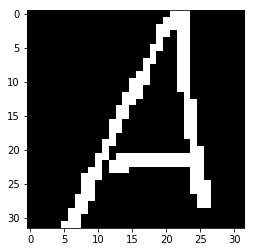

In [2]:
from torchvision import transforms
test_img = transforms.ToPILImage()(hasy_train.data[0])
plt.imshow(test_img, cmap='gray')
plt.show()

In [ ]:
hasy_model = CharacterClassifier(hasy_train.img_dims, [10, 25, 25, 50, 100], hasy_train.no_labels)
hasy_model.train()

epochs = 1
optimizer = torch.optim.SGD(hasy_model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(hasy_train, batch_size=16, shuffle=True)
test_loader = DataLoader(hasy_test, batch_size=16, shuffle=False)
    
for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = hasy_model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 600 == 0:
                print('Loss: {}'.format(loss))
torch.save(hasy_model.state_dict(), 'hasy_model.ckpt')        
           

accuracies = []
for idx, [x_test, y_test] in enumerate(tqdm(test_loader, desc='Test')):
    test_pred = hasy_model(x_test)
    accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
    accuracies.append(accuracy)
print("Accuracy: {0}".format(np.mean(accuracies)))  





  0%|          | 0/9453 [00:00<?, ?it/s]

Epoch 0






  0%|          | 1/9453 [00:00<1:19:18,  1.99it/s]

Loss: 5.911886692047119






  0%|          | 2/9453 [00:00<1:18:33,  2.01it/s]



  0%|          | 3/9453 [00:01<1:19:00,  1.99it/s]



  0%|          | 4/9453 [00:01<1:14:23,  2.12it/s]



  0%|          | 5/9453 [00:02<1:08:56,  2.28it/s]



  0%|          | 6/9453 [00:02<1:12:58,  2.16it/s]



  0%|          | 7/9453 [00:03<1:09:08,  2.28it/s]



  0%|          | 8/9453 [00:03<1:07:35,  2.33it/s]



  0%|          | 9/9453 [00:04<1:08:17,  2.30it/s]



  0%|          | 10/9453 [00:04<1:09:44,  2.26it/s]



  0%|          | 11/9453 [00:04<1:10:00,  2.25it/s]



  0%|          | 12/9453 [00:05<1:07:26,  2.33it/s]



  0%|          | 13/9453 [00:05<1:06:28,  2.37it/s]



  0%|          | 14/9453 [00:06<1:16:12,  2.06it/s]



  0%|          | 15/9453 [00:06<1:17:26,  2.03it/s]



  0%|          | 16/9453 [00:07<1:13:14,  2.15it/s]



  0%|          | 17/9453 [00:07<1:12:44,  2.16it/s]



  0%|          | 18/9453 [00:08<1:12:10,  2.18it/s]



  0%|          | 19/9453 [00:08<1:18:29,  2.00it/s]



  0%|         

  1%|▏         | 124/9453 [01:06<1:10:46,  2.20it/s]



  1%|▏         | 125/9453 [01:07<1:18:44,  1.97it/s]



  1%|▏         | 126/9453 [01:08<1:28:11,  1.76it/s]



  1%|▏         | 127/9453 [01:08<1:20:48,  1.92it/s]



  1%|▏         | 128/9453 [01:08<1:19:59,  1.94it/s]



  1%|▏         | 129/9453 [01:09<1:26:38,  1.79it/s]



  1%|▏         | 130/9453 [01:09<1:18:40,  1.97it/s]



  1%|▏         | 131/9453 [01:10<1:15:18,  2.06it/s]



  1%|▏         | 132/9453 [01:10<1:15:59,  2.04it/s]



  1%|▏         | 133/9453 [01:11<1:21:16,  1.91it/s]



  1%|▏         | 134/9453 [01:11<1:16:17,  2.04it/s]



  1%|▏         | 135/9453 [01:12<1:12:16,  2.15it/s]



  1%|▏         | 136/9453 [01:12<1:11:32,  2.17it/s]



  1%|▏         | 137/9453 [01:13<1:22:13,  1.89it/s]



  1%|▏         | 138/9453 [01:13<1:19:10,  1.96it/s]



  1%|▏         | 139/9453 [01:14<1:15:24,  2.06it/s]



  1%|▏         | 140/9453 [01:14<1:19:05,  1.96it/s]



  1%|▏         | 141/9453 [01:15<1:27:58,  1.76i

  3%|▎         | 244/9453 [02:05<1:14:26,  2.06it/s]



  3%|▎         | 245/9453 [02:05<1:12:15,  2.12it/s]



  3%|▎         | 246/9453 [02:06<1:08:42,  2.23it/s]



  3%|▎         | 247/9453 [02:06<1:09:15,  2.22it/s]



  3%|▎         | 248/9453 [02:07<1:15:41,  2.03it/s]



  3%|▎         | 249/9453 [02:07<1:12:06,  2.13it/s]



  3%|▎         | 250/9453 [02:08<1:10:10,  2.19it/s]



  3%|▎         | 251/9453 [02:08<1:08:26,  2.24it/s]



  3%|▎         | 252/9453 [02:09<1:19:31,  1.93it/s]



  3%|▎         | 253/9453 [02:09<1:15:25,  2.03it/s]



  3%|▎         | 254/9453 [02:10<1:11:31,  2.14it/s]



  3%|▎         | 255/9453 [02:10<1:09:32,  2.20it/s]



  3%|▎         | 256/9453 [02:11<1:12:23,  2.12it/s]



  3%|▎         | 257/9453 [02:11<1:16:56,  1.99it/s]



  3%|▎         | 258/9453 [02:12<1:14:08,  2.07it/s]



  3%|▎         | 259/9453 [02:12<1:10:16,  2.18it/s]



  3%|▎         | 260/9453 [02:13<1:15:45,  2.02it/s]



  3%|▎         | 261/9453 [02:13<1:17:34,  1.97i

  4%|▍         | 364/9453 [03:05<1:12:51,  2.08it/s]



  4%|▍         | 365/9453 [03:05<1:13:22,  2.06it/s]



  4%|▍         | 366/9453 [03:06<1:19:31,  1.90it/s]



  4%|▍         | 367/9453 [03:06<1:16:56,  1.97it/s]



  4%|▍         | 368/9453 [03:07<1:11:41,  2.11it/s]



  4%|▍         | 369/9453 [03:07<1:09:40,  2.17it/s]



  4%|▍         | 370/9453 [03:08<1:16:46,  1.97it/s]



  4%|▍         | 371/9453 [03:08<1:15:53,  1.99it/s]



  4%|▍         | 372/9453 [03:09<1:13:27,  2.06it/s]



  4%|▍         | 373/9453 [03:09<1:09:30,  2.18it/s]



  4%|▍         | 374/9453 [03:10<1:18:44,  1.92it/s]



  4%|▍         | 375/9453 [03:11<1:24:34,  1.79it/s]



  4%|▍         | 376/9453 [03:11<1:25:29,  1.77it/s]



  4%|▍         | 377/9453 [03:12<1:23:38,  1.81it/s]



  4%|▍         | 378/9453 [03:12<1:20:02,  1.89it/s]